In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_38830/263523489.py:43: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="age_bracket", y="glucose_level", data=data, estimator=np.mean, color="red", join=False)


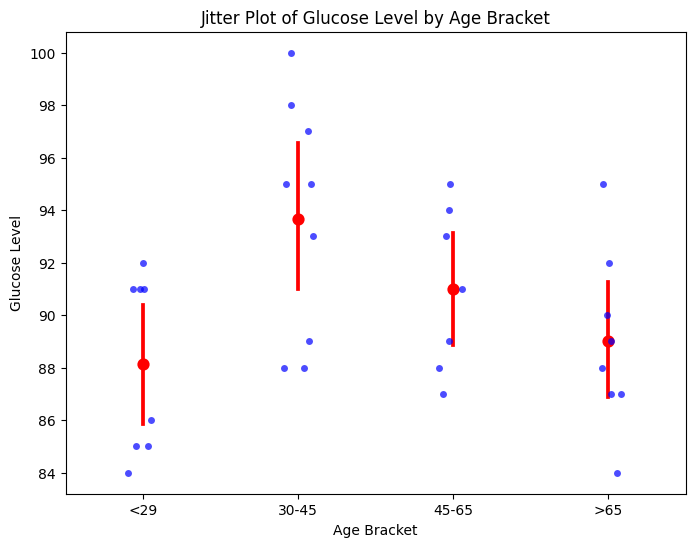

In [2]:
names_list = [
    "Kento Ando", "Tim Bergmann", "Leif Carlsen", "Raphael Carlsen", "Tobias Carlsen",
    "Balan Dayal", "Gunnar Eklund", "Julian Eklund", "Raphael Eklund", "Devak Gadhavi",
    "Marc Hauser", "Magnar Jensen", "Christophe Joubert", "Kahaan Kapoor", "Jagan Lahiri",
    "Halden Lund", "Gregoire Marchal", "Timothy Marshall", "Warren Marshall", "Miroslav Marx",
    "Henri Mathieu", "Jacob Moore", "Hunter Morris", "Lucas Morris", "Tomas Pallesen",
    "Luke Regan", "Auna Sato", "Shun Sato", "Tove Solberg", "Devak Srinivasan",
    "Soren Svendsen", "Peter Watanabe"
]

glucose_level = [
    98, 88, 89, 93, 88, 90, 85, 89, 91, 93, 86, 95, 95, 84, 87, 100, 95, 88, 85, 97,
    91, 92, 87, 84, 89, 95, 91, 92, 91, 87, 94, 88
]

age = [
    44, 53, 55, 44, 31, 77, 8, 42, 26, 53, 11, 89, 32, 67, 78, 40,
    53, 32, 11, 33, 26, 68, 47, 7, 88, 41, 26, 7, 62, 70, 51, 89
]

# Assign age brackets
age_bracket = []
for a in age:
    if a < 30:
        age_bracket.append("<29")
    elif 30 <= a <= 45:
        age_bracket.append("30-45")
    elif 45 < a <= 65:
        age_bracket.append("45-65")
    else:
        age_bracket.append(">65")

data = pd.DataFrame({
    "names": names_list,
    "glucose_level": glucose_level,
    "age": age,
    "age_bracket": pd.Categorical(age_bracket, categories=["<29", "30-45", "45-65", ">65"], ordered=True)
})

# Plot jitter with means
plt.figure(figsize=(8,6))
sns.stripplot(x="age_bracket", y="glucose_level", data=data, jitter=True, color="blue", alpha=0.7)
sns.pointplot(x="age_bracket", y="glucose_level", data=data, estimator=np.mean, color="red", join=False)
plt.title("Jitter Plot of Glucose Level by Age Bracket")
plt.xlabel("Age Bracket")
plt.ylabel("Glucose Level")
plt.show()

In [3]:
model1 = smf.ols("glucose_level ~ age_bracket", data=data).fit()
print(anova_lm(model1, typ=2))

                sum_sq    df         F    PR(>F)
age_bracket  155.09375   3.0  3.820631  0.020609
Residual     378.87500  28.0       NaN       NaN


In [4]:
q2 = pd.read_csv("HW 2 Q2 Data S2025.csv")
model2 = smf.ols("Days ~ C(TypeofCar)", data=q2).fit()
print(anova_lm(model2, typ=2))

               sum_sq    df         F    PR(>F)
C(TypeofCar)   16.675   3.0  1.109817  0.357824
Residual      180.300  36.0       NaN       NaN


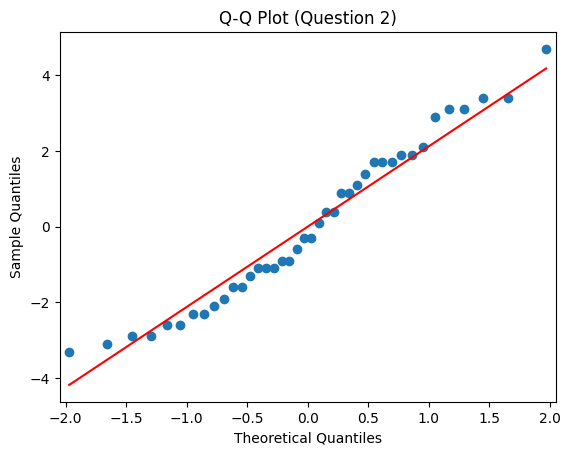

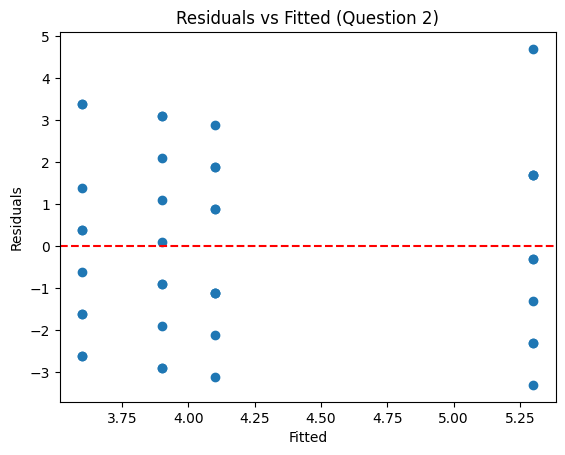

In [5]:
sm.qqplot(model2.resid, line="s")
plt.title("Q-Q Plot (Question 2)")
plt.show()

plt.scatter(model2.fittedvalues, model2.resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Question 2)")
plt.show()

In [7]:
q3.head()

,Circuit Type,Response Time
0,1,9
1,1,12
2,1,10
3,1,8
4,1,15


In [11]:
q3 = pd.read_csv("HW2 Q3 Data S2025.csv")

# Independent variable: categorical
q3["Circuit_Type"] = q3["Circuit Type"].astype("category")

# Dependent variable: numeric (don't convert this to category!)
q3["Response_Time"] = pd.to_numeric(q3["Response Time"], errors="coerce")

# Fit ANOVA model
model3 = smf.ols("Response_Time ~ C(Circuit_Type)", data=q3).fit()
print(anova_lm(model3, typ=2))

                 sum_sq    df         F    PR(>F)
C(Circuit_Type)   543.6   2.0  16.08284  0.000402
Residual          202.8  12.0       NaN       NaN


In [12]:
tukey = pairwise_tukeyhsd(q3["Response_Time"], q3["Circuit_Type"], alpha=0.01)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     11.4 0.0024   2.1232 20.6768   True
     1      3     -2.4 0.6367 -11.6768  6.8768  False
     2      3    -13.8 0.0005 -23.0768 -4.5232   True
-----------------------------------------------------


/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_38830/736190611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q3_sum = q3.groupby("Circuit_Type").agg(


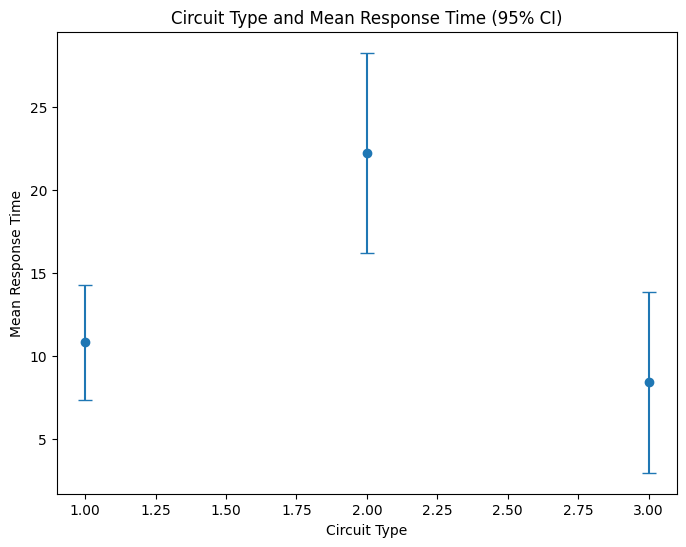

In [13]:
q3_sum = q3.groupby("Circuit_Type").agg(
    mean=("Response_Time", "mean"),
    sd=("Response_Time", "std"),
    n=("Response_Time", "count")
).reset_index()
q3_sum["se"] = q3_sum["sd"] / np.sqrt(q3_sum["n"])
q3_sum["lower"] = q3_sum["mean"] - stats.t.ppf(0.975, q3_sum["n"]-1) * q3_sum["se"]
q3_sum["upper"] = q3_sum["mean"] + stats.t.ppf(0.975, q3_sum["n"]-1) * q3_sum["se"]

plt.figure(figsize=(8,6))
plt.errorbar(q3_sum["Circuit_Type"], q3_sum["mean"], 
             yerr=[q3_sum["mean"]-q3_sum["lower"], q3_sum["upper"]-q3_sum["mean"]],
             fmt="o", capsize=5)
plt.title("Circuit Type and Mean Response Time (95% CI)")
plt.xlabel("Circuit Type")
plt.ylabel("Mean Response Time")
plt.show()

In [14]:
print(q3.groupby("Circuit_Type")["Response_Time"].mean())

Circuit_Type
1    10.8
2    22.2
3     8.4
Name: Response_Time, dtype: float64


/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_38830/1245711146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(q3.groupby("Circuit_Type")["Response_Time"].mean())


In [15]:
q4 = pd.read_csv("HW2 Q4 Data S2025.csv")
q4["Pressure"] = q4["Pressure"].astype("category")
q4["Temperature"] = q4["Temperature"].astype("category")

model4 = smf.ols("Yield ~ C(Pressure) * C(Temperature)", data=q4).fit()
print(anova_lm(model4, typ=2))

                              sum_sq   df         F    PR(>F)
C(Pressure)                 0.767778  2.0  21.59375  0.000367
C(Temperature)              0.301111  2.0   8.46875  0.008539
C(Pressure):C(Temperature)  0.068889  4.0   0.96875  0.470006
Residual                    0.160000  9.0       NaN       NaN


In [16]:
print(q4.groupby(["Pressure", "Temperature"])["Yield"].mean().reset_index())

  Pressure Temperature  Yield
0      200         150  90.30
1      200         160  90.20
2      200         170  90.60
3      215         150  90.65
4      215         160  90.55
5      215         170  90.85
6      230         150  90.30
7      230         160  90.00
8      230         170  90.25


/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_38830/1607608513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(q4.groupby(["Pressure", "Temperature"])["Yield"].mean().reset_index())
